In [2]:
import pandas as pd

In [4]:
Data_link = "http://bit.ly/w-data"

In [5]:
data = pd.read_csv(Data_link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

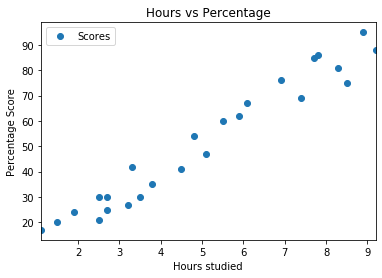

In [9]:
data.plot(x = 'Hours' , y = 'Scores' , style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data_x = data.drop(["Scores"], axis = 1)
data_y = data.Scores

In [13]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size = .2, random_state = 0)

In [15]:
from sklearn import linear_model

In [17]:
reg = linear_model.LinearRegression()

In [18]:
reg.fit(data_x_train, data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
reg.coef_

array([9.91065648])

In [21]:
reg.intercept_

2.018160041434662

In [23]:
Rsquare = reg.score(data_x_train , data_y_train)
Rsquare


0.9515510725211553

In [24]:
data_x_train.shape

(20, 1)

In [25]:
K = 1
N = 20
AdjRsquare = 1 - (1-Rsquare) * (N-1) / (N-K-1)
AdjRsquare

0.9488594654389974

In [26]:
line = reg.coef_* data_x + reg.intercept_

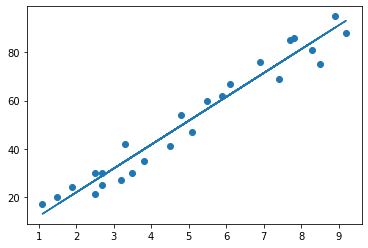

In [27]:
plt.scatter(data_x, data_y)
plt.plot(data_x, line);
plt.show()

In [28]:
pred_test = reg.predict(data_x_test)
pred_test

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [29]:
df = pd.DataFrame({'Actual': data_y_test, 'Predicted': pred_test})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [30]:
hours = [[9.25]]
own_pred = reg.predict(hours)
own_pred

array([93.69173249])

In [31]:
error_test = data_y_test - pred_test
error_test

5     3.115855
2    -6.732261
19   -6.357018
16    3.205199
11    1.508967
Name: Scores, dtype: float64

In [32]:
import seaborn as sns

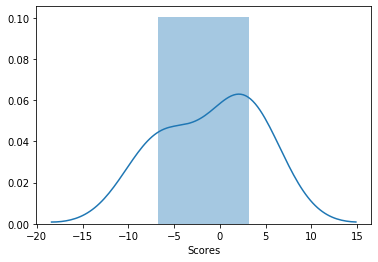

In [33]:
sns.distplot(error_test)

(array([2., 0., 0., 0., 0., 0., 0., 0., 1., 2.]),
 array([-6.73226078, -5.73851483, -4.74476887, -3.75102292, -2.75727696,
        -1.76353101, -0.76978506,  0.2239609 ,  1.21770685,  2.2114528 ,
         3.20519876]),
 <a list of 10 Patch objects>)

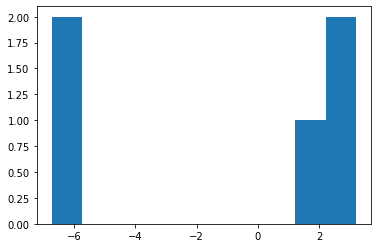

In [34]:
plt.hist(error_test)

In [35]:
import numpy as np

In [36]:

MSE = np.mean(error_test *error_test )
MSE   

21.598769307217456

In [37]:
RMSE = np.power(MSE, .5)
RMSE 

4.647447612100373

In [38]:
MAE = np.mean(np.absolute(error_test ))
MAE

4.183859899002982

In [39]:
MAPE = np.mean(np.absolute(error_test/ data_y_test)) * 100
MAPE

12.568891617045686

In [40]:
Accuracy = 100 - MAPE
Accuracy

87.4311083829543

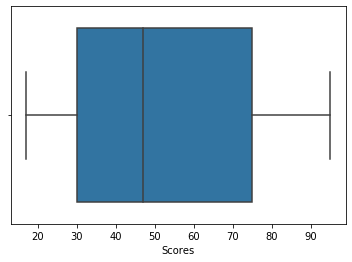

In [41]:
sns.boxplot(data.Scores)